## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 10
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['16'],
    'data_type': 'audio',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['40Gi'],
    'model_variants': [   'facebook/s2t-small-librispeech-asr',
                          'facebook/s2t-medium-librispeech-asr',
                          'facebook/s2t-large-librispeech-asr',
                          'facebook/wav2vec2-base-960h',
                          'facebook/wav2vec2-large-960h'],
    'node_name': 'audio',
    'pipeline_name': '2-paper-audio-sent',
    'repetition': 2,
    'replicas': [1],
    'series': 10,
    'series_meta': 'checking effect of batch size,\\n cpu type: Intel(R) '
                   'Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 180,
    'workload_config': {'load_duration': 60, 'loads_to_test': [20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-small-librispeech-asr,1,0.542132,2210.661262,0.417400
1,facebook/s2t-small-librispeech-asr,1,0.605040,10722.326650,0.426336
2,facebook/s2t-small-librispeech-asr,2,0.711916,2205.141582,0.533491
3,facebook/s2t-small-librispeech-asr,2,0.675319,7480.375975,0.521481
4,facebook/s2t-small-librispeech-asr,4,0.905582,1399.541970,0.712837
5,facebook/s2t-small-librispeech-asr,4,0.907235,5070.775933,0.738742
6,facebook/s2t-small-librispeech-asr,8,1.950975,1284.958395,1.243551
7,facebook/s2t-small-librispeech-asr,8,1.629192,4707.614048,1.069644
8,facebook/s2t-small-librispeech-asr,16,2.605489,929.032793,1.269067
9,facebook/s2t-small-librispeech-asr,16,2.382738,3994.053425,1.283849


Text(0, 0.5, 'Latency (seconds)')

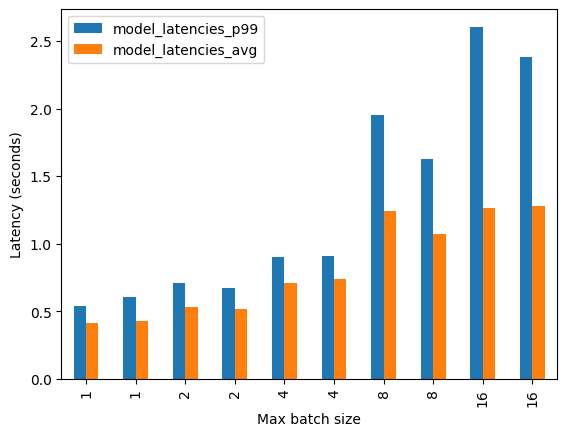

In [5]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/s2t-small-librispeech-asr']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-medium-librispeech-asr,1,0.716629,2512.246499,0.530222
1,facebook/s2t-medium-librispeech-asr,1,0.667134,11156.215864,0.508452
2,facebook/s2t-medium-librispeech-asr,2,1.390935,2161.899728,0.821620
3,facebook/s2t-medium-librispeech-asr,2,1.647787,10840.247154,0.872821
4,facebook/s2t-medium-librispeech-asr,4,2.512985,2169.294428,1.583388
5,facebook/s2t-medium-librispeech-asr,4,2.408420,10285.550139,1.636157
6,facebook/s2t-medium-librispeech-asr,8,3.076565,2123.200396,2.020977
7,facebook/s2t-medium-librispeech-asr,8,3.077385,8887.986618,2.059298
8,facebook/s2t-medium-librispeech-asr,16,4.137540,1783.459998,1.674592
9,facebook/s2t-medium-librispeech-asr,16,3.197510,5855.942701,1.629196


Text(0, 0.5, 'Latency (seconds)')

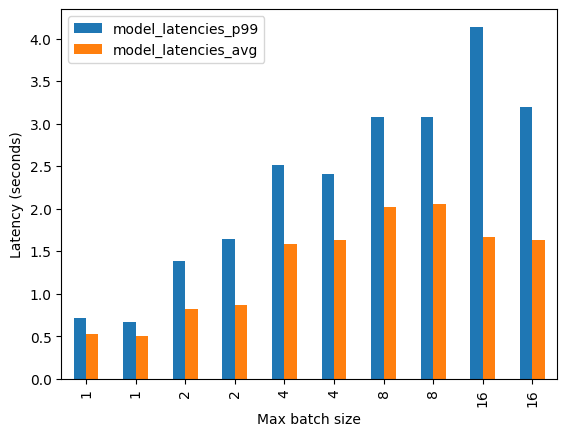

In [6]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/s2t-medium-librispeech-asr']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-large-librispeech-asr,1,1.346824,2587.527644,0.810716
1,facebook/s2t-large-librispeech-asr,1,NaN,10988.626597,NaN
2,facebook/s2t-large-librispeech-asr,2,2.488598,2594.473169,1.296169
3,facebook/s2t-large-librispeech-asr,2,NaN,11045.620579,NaN
4,facebook/s2t-large-librispeech-asr,4,5.935867,2183.445376,2.231558
5,facebook/s2t-large-librispeech-asr,4,2.508372,11142.305128,2.080447
6,facebook/s2t-large-librispeech-asr,8,5.651449,2180.126545,2.859517
7,facebook/s2t-large-librispeech-asr,8,4.147036,11088.952212,2.951343
8,facebook/s2t-large-librispeech-asr,16,7.232447,2161.784418,3.163188
9,facebook/s2t-large-librispeech-asr,16,7.176627,10461.680496,2.595306


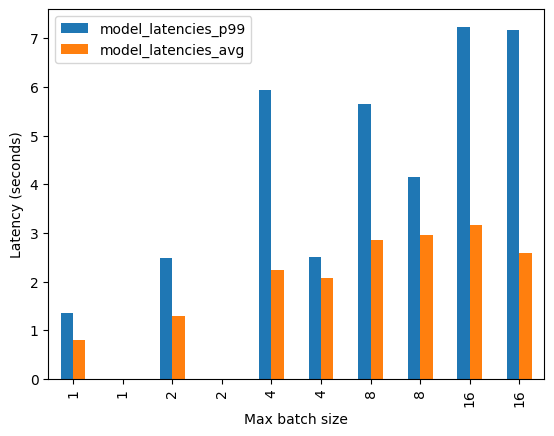

In [7]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/s2t-large-librispeech-asr']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")
output

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/wav2vec2-base-960h,1,0.393788,1885.581290,0.250221
1,facebook/wav2vec2-base-960h,1,0.592895,7597.348581,0.337985
2,facebook/wav2vec2-base-960h,2,0.601100,1720.923082,0.437882
3,facebook/wav2vec2-base-960h,2,0.579811,6112.400734,0.435354
4,facebook/wav2vec2-base-960h,4,1.109812,1415.632257,0.798590
5,facebook/wav2vec2-base-960h,4,1.309534,5838.126341,0.961265
6,facebook/wav2vec2-base-960h,8,2.079108,1544.027946,1.553380
7,facebook/wav2vec2-base-960h,8,2.129789,5848.092693,1.631533
8,facebook/wav2vec2-base-960h,16,6.151247,2157.876563,2.039256
9,facebook/wav2vec2-base-960h,16,4.194716,7167.128076,1.831879


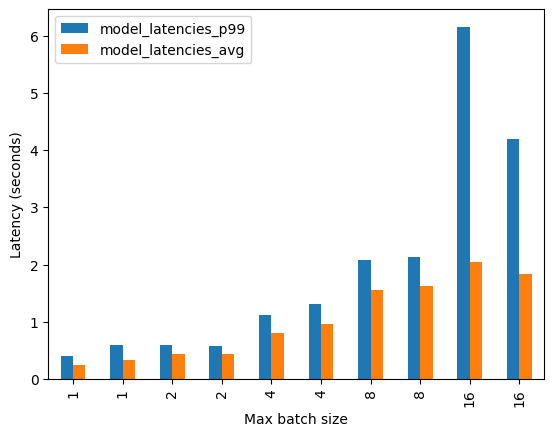

In [8]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/wav2vec2-base-960h']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")
output

,model_variant,max_batch_size,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/wav2vec2-large-960h,1,0.978856,2513.603430,0.560398
1,facebook/wav2vec2-large-960h,1,0.788666,11151.806361,0.554467
2,facebook/wav2vec2-large-960h,2,1.522637,2597.485502,0.945174
3,facebook/wav2vec2-large-960h,2,1.298671,11180.650743,0.998869
4,facebook/wav2vec2-large-960h,4,3.195165,2558.301241,1.982056
5,facebook/wav2vec2-large-960h,4,1.916410,11153.958045,1.530353
6,facebook/wav2vec2-large-960h,8,5.166411,2189.986065,2.968917
7,facebook/wav2vec2-large-960h,8,4.090187,10514.088462,2.515895
8,facebook/wav2vec2-large-960h,16,7.992796,2490.105853,3.691698
9,facebook/wav2vec2-large-960h,16,6.749946,10567.870144,3.402032


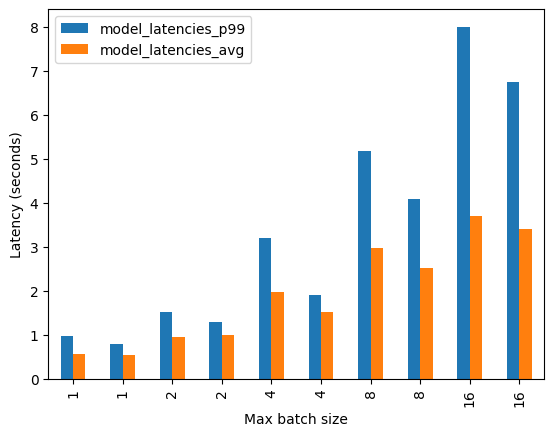

In [9]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'facebook/wav2vec2-large-960h']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")
output

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,facebook/s2t-small-librispeech-asr,16,40Gi,0.711916,2205.141582,0.533491
1,facebook/s2t-small-librispeech-asr,16,40Gi,0.675319,7480.375975,0.521481
2,facebook/s2t-medium-librispeech-asr,16,40Gi,1.390935,2161.899728,0.821620
3,facebook/s2t-medium-librispeech-asr,16,40Gi,1.647787,10840.247154,0.872821
4,facebook/s2t-large-librispeech-asr,16,40Gi,2.488598,2594.473169,1.296169
5,facebook/s2t-large-librispeech-asr,16,40Gi,NaN,11045.620579,NaN
6,facebook/wav2vec2-base-960h,16,40Gi,0.601100,1720.923082,0.437882
7,facebook/wav2vec2-base-960h,16,40Gi,0.579811,6112.400734,0.435354
8,facebook/wav2vec2-large-960h,16,40Gi,1.522637,2597.485502,0.945174
9,facebook/wav2vec2-large-960h,16,40Gi,1.298671,11180.650743,0.998869


Text(0, 0.5, 'Latency (seconds)')

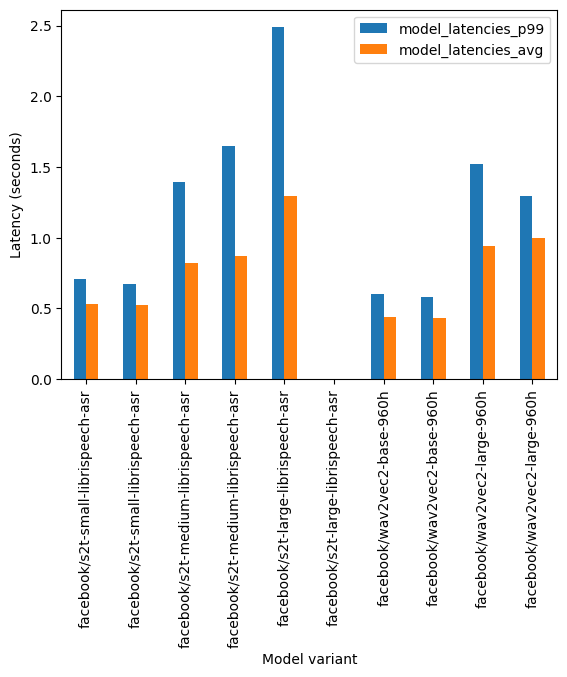

In [10]:
experiment_ids = key_config_df[
    key_config_df['max_batch_size'] == 2]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Model variant")
ax.set_ylabel("Latency (seconds)")